In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

from celavi.simple_model import Context

np.random.seed(0)

## DES Model setup

In [6]:
number_of_turbines = 620

K = 2.2   # DES Weibull shape parameter
L = 20.0  # DES Weibull scale parameter

year_built = 2020

lifespan_fns = {
    "nacelle": lambda: 30,
    "blade": lambda: round(float(weibull_min.rvs(K, loc=0, scale=L, size=1))),  # EOLs on whole years
    "foundation": lambda: 50,
    "tower": lambda: 50,
}

turbine = [
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": year_built,
    },
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": year_built,
    },
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": year_built,
    },
    {
        "kind": "nacelle",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": year_built,
    },
    {
        "kind": "tower",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": year_built,
    },
    {
        "kind": "foundation",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": year_built,
    },
]

components = pd.DataFrame(turbine * number_of_turbines)

## DES Model Execution

In [7]:
context = Context()
context.populate(components, lifespan_fns)
landfill_inventory = context.run()

## Plot DES results with turbine blade EOL model's results

The left plot is just number of blades landfilled, not the mass landfilled.

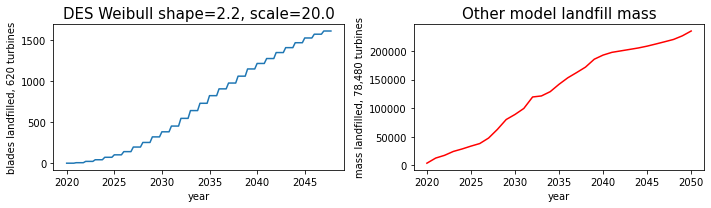

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ys = landfill_inventory.loc[160:, "blade"]
xs = np.arange(len(ys)) / 4 + 2020  # Convert from discrete time to years
ax[0].plot(xs, ys)
ax[0].set_ylabel(f"blades landfilled, {number_of_turbines} turbines")
ax[0].set_xlabel("year")
ax[0].set_title(f"DES Weibull shape={K}, scale={L}", fontsize=15)

df = pd.read_csv("other_model_blades_retired_per_year.csv")
xs = df["Year"].values
ys = df["Blades.Retired.Per.Year"].values
ys = np.cumsum(ys)
ax[1].plot(xs, ys, color="r")
ax[1].set_ylabel(f"mass landfilled, 78,480 turbines")
ax[1].set_xlabel("year")
ax[1].set_title(f"Other model landfill mass", fontsize=15)

plt.tight_layout()
plt.show()

## Compare Weibull PDFs and CDFs

Both plots are over the bounds of the years in question. The other model's timespan is from 0 to 30 years. Over the bounds which they are used. Each distribution starts from the year 2020, which is year 0.

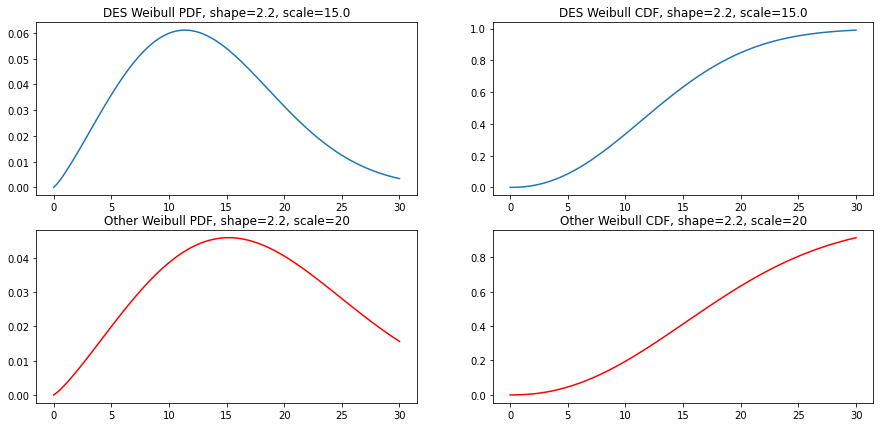

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

des_weibull = weibull_min(K, scale=L)
des_xs = np.linspace(0, 30, 100)
des_ys = des_weibull.pdf(des_xs)
ax[0, 0].plot(des_xs, des_ys)
ax[0, 0].set_title(f"DES Weibull PDF, shape={K}, scale={L}")
des_ys = des_weibull.cdf(des_xs)
ax[0, 1].plot(des_xs, des_ys)
ax[0, 1].set_title(f"DES Weibull CDF, shape={K}, scale={L}")

other_K = 2.2
other_L = 20

other_weibull = weibull_min(other_K, scale=other_L)
other_xs = np.linspace(0, 30, 100)
other_ys = other_weibull.pdf(other_xs)
ax[1, 0].plot(other_xs, other_ys, color="r")
ax[1, 0].set_title(f"Other Weibull PDF, shape={other_K}, scale={other_L}")
other_ys = other_weibull.cdf(other_xs)
ax[1, 1].plot(other_xs, other_ys, color="r")
ax[1, 1].set_title(f"Other Weibull CDF, shape={other_K}, scale={other_L}")

plt.show()